# Data exploration

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
%matplotlib inline

In [2]:
credits = pd.read_csv('tmdb_5000_credits.csv')
movies = pd.read_csv('tmdb_5000_movies.csv')

In [3]:
# Assess number of rows and columns of dataset
print(movies.shape)
print(credits.shape)

(4803, 20)
(4803, 4)


In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [5]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [6]:
credits.isnull().sum()

movie_id    0
title       0
cast        0
crew        0
dtype: int64

In [7]:
movies.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


### Notable findings:
1. Popularity ranges from 0~876, but has an mean 21. 876 might be a outlier.
2. Budget ranges from approx. 0~380 million, having an average 29 million.
3. Revenue ranges from 0~ 2787 million,having an mean 82 million.

# Data cleaning

In [8]:
print(sum(movies.duplicated()))
sum((credits.duplicated()))

0


0

In [9]:
movies.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [10]:
credits.isnull().sum()

movie_id    0
title       0
cast        0
crew        0
dtype: int64

In [11]:
##check whether outliers
movies[['original_title','popularity', 'vote_count', 'vote_average']].sort_values('popularity', ascending=False).head(25)

,original_title,popularity,vote_count,vote_average
546,Minions,875.581305,4571,6.4
95,Interstellar,724.247784,10867,8.1
788,Deadpool,514.569956,10995,7.4
94,Guardians of the Galaxy,481.098624,9742,7.9
127,Mad Max: Fury Road,434.278564,9427,7.2
28,Jurassic World,418.708552,8662,6.5
199,Pirates of the Caribbean: The Curse of the Bla...,271.972889,6985,7.5
82,Dawn of the Planet of the Apes,243.791743,4410,7.3
200,The Hunger Games: Mockingjay - Part 1,206.227151,5584,6.6
88,Big Hero 6,203.734590,6135,7.8


In [12]:
movies[['original_title','popularity', 'vote_count', 'vote_average']].sort_values('popularity', ascending=False).tail()

,original_title,popularity,vote_count,vote_average
4625,Midnight Cabaret,0.001389,0,0.0
4118,Hum To Mohabbat Karega,0.001186,0,0.0
4727,Penitentiary,0.001117,8,4.9
3361,Alien Zone,0.000372,3,4.0
4553,America Is Still the Place,0.000000,0,0.0



### Notable findings
1. Doesn't look like there are outliers for popularity, just a wide range of values. 
2. Review the vote_count column while exploring the data, might want to weight averages with higher vote counts since it's a larger sample size.


### creat new columns profit, revenue_rating for further analysis

In [13]:
###add a profit columns so we can learn more about the profitability or creat profitability ratio.
movies['profit'] = movies['revenue']-movies['budget']
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,profit
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2550965087
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,661000000
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,635674609
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,834939099
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,24139100


In [14]:
# check whether negative number exists in profit.
movies.loc[movies['profit']<0,'profit'].sum()

-19950292470

In [15]:
# make sure no negative num in profit.
movies.loc[movies['profit']<0,'profit']=0

In [16]:
## Profitability ratio = (profit/revenue) x 100 = percentage
movies['profitability_ratio'] = (movies['profit']/(movies['revenue']+.0001))*100
movies['profitability_ratio'] = movies['profitability_ratio'].astype(int)
movies.sort_values(['profitability_ratio'],ascending=False).tail()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,profit,profitability_ratio
2622,15000000,"[{""id"": 53, ""name"": ""Thriller""}]",http://in-crowd.warnerbros.com/,36047,"[{""id"": 187056, ""name"": ""woman director""}]",en,The In Crowd,A mentally disturbed young woman takes a job a...,0.249245,"[{""name"": ""Morgan Creek Productions"", ""id"": 10...",...,5217498,105.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,What would you do to get in?,The In Crowd,4.7,15,0,0
2623,15000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 80, ""...",NaN,8053,"[{""id"": 2296, ""name"": ""border patrol""}, {""id"":...",en,The Three Burials of Melquiades Estrada,When brash Texas border officer Mike Norton (B...,12.163832,"[{""name"": ""The Javelina Film Company"", ""id"": 2...",...,12036149,121.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Nobody is beyond redemption.,The Three Burials of Melquiades Estrada,7.0,177,0,0
2624,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",NaN,2290,"[{""id"": 835, ""name"": ""jewry""}, {""id"": 1799, ""n...",en,Jakob the Liar,"In 1944 Poland, a Jewish shop keeper named Jak...",8.962245,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"When all hope was lost, he invented it.",Jakob the Liar,6.0,90,0,0
2626,25000000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 35, ""n...",NaN,6552,"[{""id"": 13130, ""name"": ""teenager""}, {""id"": 155...",en,Idle Hands,Anton is a cheerful but exceedingly non-ambiti...,8.583217,"[{""name"": ""Columbia Pictures Corporation"", ""id...",...,4152230,92.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The touching story of a boy and his right hand.,Idle Hands,6.1,182,0,0
4802,0,"[{""id"": 99, ""name"": ""Documentary""}]",NaN,25975,"[{""id"": 1523, ""name"": ""obsession""}, {""id"": 224...",en,My Date with Drew,Ever since the second grade when he first saw ...,1.929883,"[{""name"": ""rusty bear entertainment"", ""id"": 87...",...,0,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,My Date with Drew,6.3,16,0,0


In [17]:
print(movies['profitability_ratio'].nunique())

100


In [18]:
##create a new column, revenue_rating to splice the revenue column into groups: low (under a million), mediun (millions), and high (billions).
bin_edges = [0, 1e+06, 1e+09, 2.827124e+09]
bin_names = ['under_million', 'millions', 'billions']
movies['revenue_rating'] = pd.cut(movies['revenue'], bin_edges, labels=bin_names)
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,profit,profitability_ratio,revenue_rating
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2550965087,91,billions
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,661000000,68,millions
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,635674609,72,millions
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,834939099,76,billions
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,24139100,8,millions


In [19]:
movies['revenue_rating'].value_counts()

millions         3162
under_million     193
billions           21
Name: revenue_rating, dtype: int64

In [20]:
movies.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
profit                     0
profitability_ratio        0
revenue_rating          1427
dtype: int64

In [21]:
#To clean up the revenue rating, let's make all the rows with null values 0 since those rows have no revenue or budget
movies.revenue_rating.fillna('under_million',inplace=True)
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   budget                4803 non-null   int64   
 1   genres                4803 non-null   object  
 2   homepage              1712 non-null   object  
 3   id                    4803 non-null   int64   
 4   keywords              4803 non-null   object  
 5   original_language     4803 non-null   object  
 6   original_title        4803 non-null   object  
 7   overview              4800 non-null   object  
 8   popularity            4803 non-null   float64 
 9   production_companies  4803 non-null   object  
 10  production_countries  4803 non-null   object  
 11  release_date          4802 non-null   object  
 12  revenue               4803 non-null   int64   
 13  runtime               4801 non-null   float64 
 14  spoken_languages      4803 non-null   object  
 15  stat

In [24]:
def get_genres(series):
    lst=[]
    for i in range(len(movies['genres'])):
        item=eval(series[i])
        genres=list()
        for j in range(len(item)):
            genres.append(item[j]['name'])
        lst.append(genres)
    return lst

genres=get_genres(movies['genres'])
df = movies.copy()
df['genres']=genres

# Top 10 release date of movies 

In [25]:
movies.release_date.value_counts()[:10]

2006-01-01    10
2002-01-01     8
1999-10-22     7
2014-12-25     7
2013-07-18     7
2004-09-03     7
2003-01-01     6
2007-01-01     6
2015-10-16     6
2005-01-01     6
Name: release_date, dtype: int64

In [26]:
date = movies.release_date

In [28]:
t = []
for x in date:
    if len(str(x))==4:
        t.append(x)
    else:
        t.append(str(x)[:4])
# datet= pd.to_datetime(lst)
T=pd.Series(t).value_counts()
T[:10]

2009    247
2014    238
2006    237
2013    231
2008    227
2010    225
2011    223
2005    217
2015    216
2012    208
dtype: int64

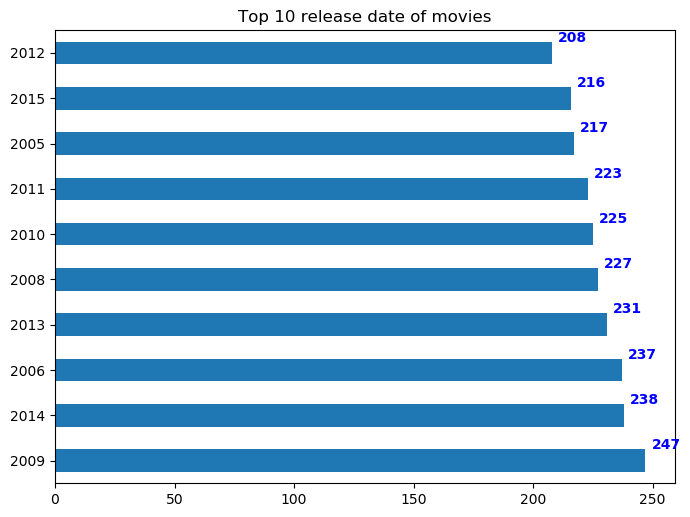

In [29]:
# fig, ax = plt.subplots()    
fig = plt.figure(1, figsize=(8, 6), frameon=False, dpi=100)

T[:10].plot.barh()
plt.title('Top 10 release date of movies')

for i, v in enumerate(T[:10]):
    plt.text(v + 2.5, i + .25, str(v), color='blue', fontweight='bold')
    

# Exploratory Data Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a19fce2e8>,
      dtype=object)

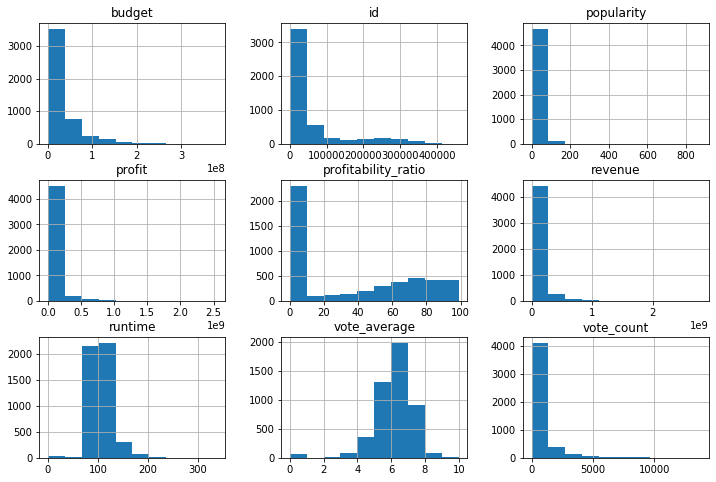

In [30]:
movies.hist(figsize=(12,8))

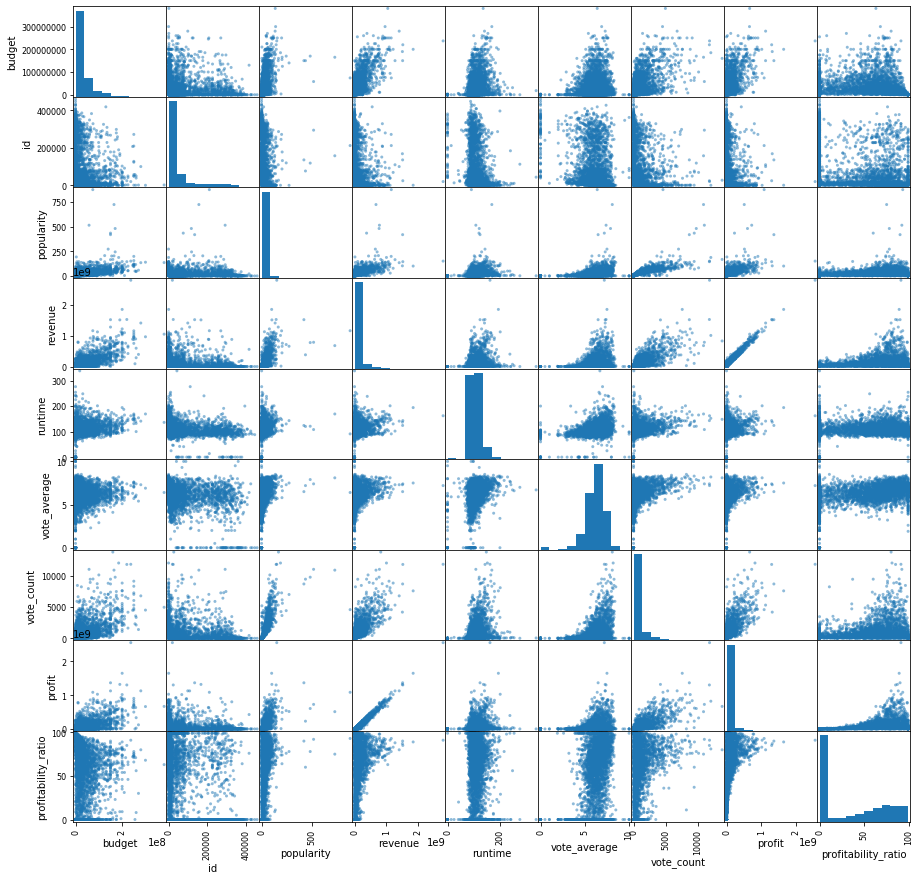

In [31]:
pd.plotting.scatter_matrix(movies, figsize=(15, 15));

At first glance, revenue and budget are positively correlated.

# What genres are most popular overall?

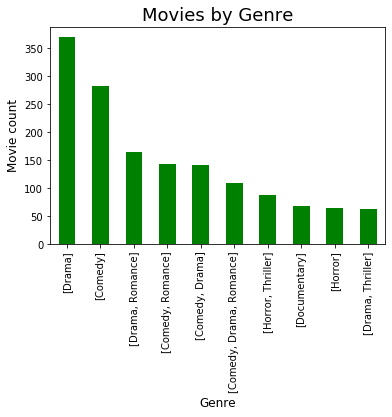

In [32]:
df['genres'].value_counts()[:10].plot(kind='bar', color='g')
plt.title('Movies by Genre', size=18)
plt.xlabel('Genre', size=12)
plt.ylabel('Movie count', size=12);

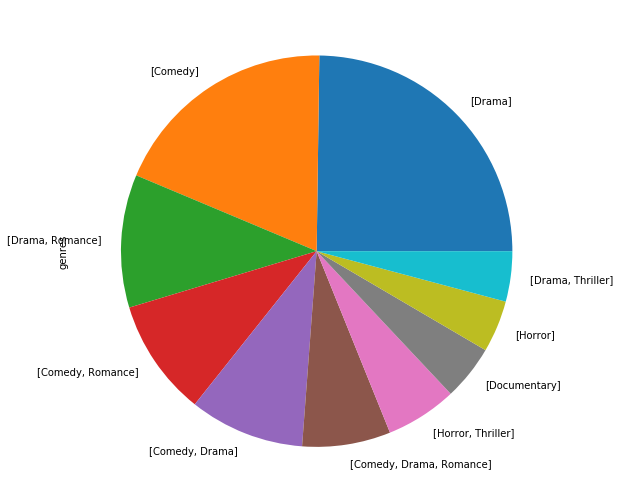

In [33]:
df['genres'].value_counts()[:10].plot(kind='pie',figsize=(9,9))

Text(0, 0.5, 'Runtime: Movie Length, minutes')

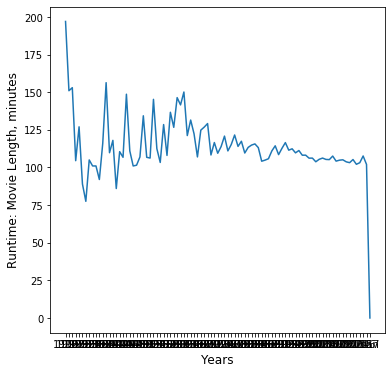

In [34]:
df['release_year']=t
plt.figure(figsize=(6,6))
runtime = df.groupby('release_year')['runtime'].mean()
plt.plot(runtime)
plt.xlabel('Years', size=12)
plt.ylabel('Runtime: Movie Length, minutes', size=12)

Runtime has decreased throughout the years, from 200 minutes in 90s to 97 minutes in 2015. Let's look at this data for the decades:

# Top 10 Movies with Maximum Revenue

In [35]:
df_credits=credits[['movie_id','title']]
df_credits=df_credits.rename(columns={'movie_id':'id'})
df = pd.merge(df, df_credits, how='left', on='id')

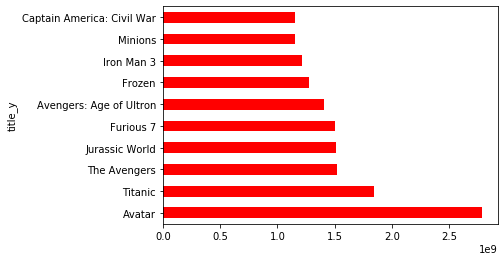

In [39]:
df1=df.set_index('title_y')
top10_revenue=df1['revenue'].sort_values(ascending=False)[:10]
top10_revenue.plot.barh(color='red')

# Does the movies in top 10 revenue list correspond with profit

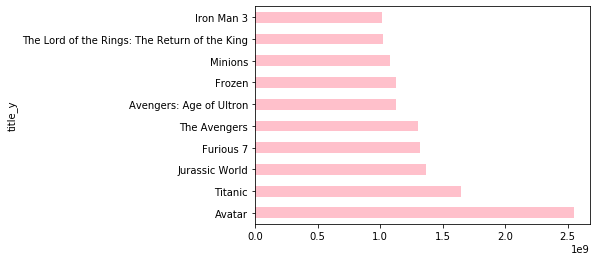

In [40]:
top10_profit=df1['profit'].sort_values(ascending=False)[:10]
top10_profit.plot.barh(color='pink')

The movies with higher revenue doesn't means that it makes higher profit.

In [41]:
df1['profitability_ratio'].sort_values(ascending=False).head(30)

title_y
Touching the Void                    99
Tarnation                            99
My Dog Tulip                         99
Slow West                            99
Trippin'                             99
Water                                99
Free Style                           99
Glory Road                           99
Frances Ha                           99
Police Academy: Mission to Moscow    99
Welcome to the Rileys                99
McFarland, USA                       99
Shaolin Soccer                       99
Our Kind of Traitor                  99
Flawless                             99
Feast                                99
Paranormal Activity                  99
Blue Ruin                            99
Napoleon Dynamite                    99
That Thing You Do!                   99
Kevin Hart: Let Me Explain           99
Bloody Sunday                        99
The Collection                       99
Cedar Rapids                         99
My Life Without Me              

# Summary of data
1. The dataset contains 4803 movies and has over 20 features, including budget, genres, homepage, vote information etc. The homepage is the link of particular movie and might be used in the banner to led separate page.
2. some statistic insights for features:
Popularity feature ranges from 0~876, but has an mean 21. 876. Doesn’t have outliers.
Budget ranges from approx. 0~380 million, having an average 29 million.
Revenue ranges from 0~ 2787 million,having an mean 82 million.
3. Drama, Comedy, Drama with Romance are the most popular genres in general, and make up about 50% of all movies. 
4. Runtime has decreased throughout the years, from 200 minutes in 90s to 97 minutes in 2015. Let's look at this data for the decades.
5. The most popular genres in top 10 genres movies are Drama, Comedy, Romance, Horror, Thriller and Documentary.


### Limitations of this dataset
1. This data was collected through The Movie Databae (TMDB). The value of 'popularity' and 'votes' is subjective and dependent on those users voting and navigating through the website. Pooling imdb and rotten tomatoes and other sources might yield more accurate results.